In [2]:
# Import dependencies
import pandas as pd
import matplotlib
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
import numpy as np
import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [3]:
# Choose a start date and end date for trip (3-15 days total)
# '2012-07-16', '2012-07-23'

In [4]:
# Use SQLAlchemy `create_engine` to connect to sqlite database
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Use SQLAlchemy `automap_base()` to reflect tables into classes 
Base = automap_base()
Base.prepare(engine, reflect=True)

# View classes
Base.classes.keys()

['hawaii_measurements', 'hawaii_stations']

In [6]:
# Save a reference to those classes called `Station` and `Measurement`
Measurement = Base.classes.hawaii_measurements
Station = Base.classes.hawaii_stations

In [7]:
# Create session 
session = Session(engine)

In [8]:
### Precipitation Analysis

# Design a query to retrieve the last 12 months of precipitation data.
last_year = dt.date.today() - dt.timedelta(days=365)

# Select only the `date` and `prcp` values.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()
#print(results)

# Load the query results into a Pandas DataFrame and set the index to the date column; verify data is present
precip_df = pd.DataFrame(results, columns=['date', 'precipitation'])
precip_df.set_index(precip_df['date'], inplace=True)
precip_df.head()

,date,precipitation
date,,
2017-05-03,2017-05-03,0.0
2017-05-04,2017-05-04,0.0
2017-05-05,2017-05-05,0.0
2017-05-06,2017-05-06,0.0
2017-05-07,2017-05-07,0.0


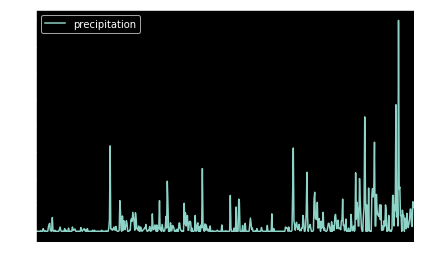

In [9]:
# Plot the results 
precip_df.plot(x_compat=True)
plt.tight_layout()
plt.show()

In [10]:
# Get summary statistics for precipitation data
precip_df.describe()

,precipitation
count,583.000000
mean,0.126638
std,0.299576
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


In [11]:
### Station Analysis

# Design a query to calculate the total number of stations
station_count = session.query(func.count(Station.station)).all()
print(station_count)

[(9,)]


In [12]:
# Design a query to find the most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station))
# List the stations and observation counts in descending order
active_stations.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [13]:
# Which station has the highest number of observations?
# 'USC00519281'

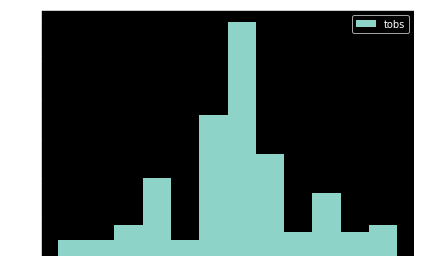

In [14]:
# Design a query to retrieve the last 12 months of temperature observation data 
last_year = dt.date.today() - dt.timedelta(days=365)

# Filter by the station with the highest number of observations
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= last_year).all()
last_year_temp = pd.DataFrame(results, columns=['tobs'])
# Plot results as histogram with 12 bins
last_year_temp.plot.hist(bins=12)
plt.tight_layout()
plt.show()

In [23]:
### Temperature Analysis
start_date = '2011-07-16'
end_date = '2011-07-23'

# Calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
tmin = session.query(func.min(Measurement.tobs)) 
tavg = session.query(func.avg(Measurement.tobs))
tmax = session.query(func.max(Measurement.tobs))
#print(tmin, tavg, tmax)
                     
tmin = tmin.filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(tmin)
tavg = tavg.filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(tavg)
tmax = tmax.filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(tmax)


[(69,)]
[(74.88461538461539,)]
[(79,)]


In [19]:
# Plot the min, avg, and max temperature from your previous query as a bar chart
#ys = 
#xs = np.arange(len(labels)) 
#plt.bar() 
#plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
#plt.yticks(ys)
# Use the average temperature as the bar height
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)